In [260]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [261]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
td = pd.concat([train, test], ignore_index=True, sort  = False)

In [262]:
td.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


В ходе многочисленных попыток приблизиться к результату более 80%, были сделаны некоторые выводы о влиянии определенных критериев на итоговую оценку:
1. Имеет смысл заполнять недостающие данные столбца "Age" в зависимости от титула пассажира;
2. Столбцы "Parch" и "SibSp" при объединении в некоторых случаях повышают оценку;
3. Место посадки "Embarked" не показало какого-либо влияния;
4. Информация из столбца "Cabin" также не влияет на выживаемость пассажиров; 
5. Нормализация с помощью StandardScaler показывает оценку выше, чем работа с ненормализованными данными;
6. При разбиении некоторых данных на диапазоны с последующим сопоставлением диапазона с числом общая оценка может увеличиться.

Рассмотрим, какие данные отсутствуют: так как столбец "Cabin" не учитывается в ходе выполнения задачи, в дальнейшем потребуется заполнить недостающие значения возраста и цены билета.

In [263]:
td.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [264]:
td.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Посмотрим, какой процент людей выжил:

In [265]:
surv = train['Survived'].value_counts()[1]
not_surv = train['Survived'].value_counts()[0]
surv_percent = surv / train.shape[0] * 100
not_surv_percent = not_surv / train.shape[0] * 100
surv_percent, not_surv_percent

(38.38383838383838, 61.61616161616161)

Рассмотрим процент выживших среди мужчин и женщин: видим, что среди женщин процент выживаемости около 74 %. Среди мужчин - около 19 %.

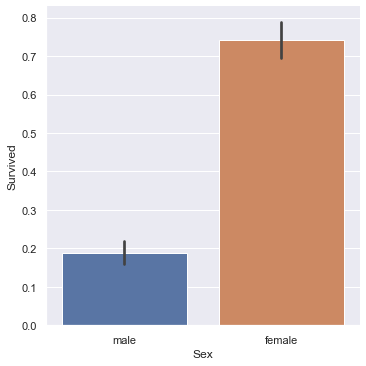

In [266]:
sns.catplot(x="Sex", y="Survived", data=train, kind="bar")

In [267]:
train.groupby(['Sex'])['Survived'].value_counts(True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

Рассмотрим процент выживших в зависимости от класса билета: видим, что процент выживших людей из 1 класса выше 60%, у людей второго класса - выше 50%, а у людей с третьим классом билета - 24 %

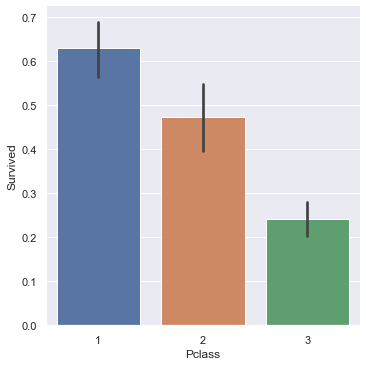

In [268]:
sns.catplot(x="Pclass", y="Survived", data=train, kind="bar")

In [269]:
train.groupby(['Pclass'])['Survived'].value_counts(True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

Рассмотрим также вероятность выживания мужчин и женщин в зависимости от класса билета: практически все женщины с билетами первого и второго класса выжили, вероятность выживания мужчин с первым классом билетов выше, чем у других.

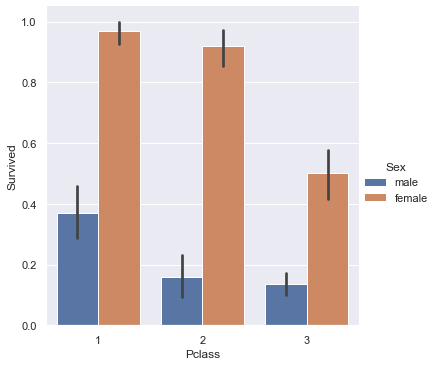

In [270]:
sns.catplot(x = "Pclass", y = "Survived", hue = "Sex", data=train, kind="bar")

In [271]:
train.groupby(['Pclass', 'Sex'])['Survived'].value_counts(True)

Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64

Рассмотрим также зависимость выживаемости от количества родственников/супругов:

In [272]:
train.groupby(['SibSp'])['Survived'].value_counts(True)

SibSp  Survived
0      0           0.654605
       1           0.345395
1      1           0.535885
       0           0.464115
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
8      0           1.000000
Name: Survived, dtype: float64

In [273]:
train.groupby(['Parch'])['Survived'].value_counts(True)

Parch  Survived
0      0           0.656342
       1           0.343658
1      1           0.550847
       0           0.449153
2      0           0.500000
       1           0.500000
3      1           0.600000
       0           0.400000
4      0           1.000000
5      0           0.800000
       1           0.200000
6      0           1.000000
Name: Survived, dtype: float64

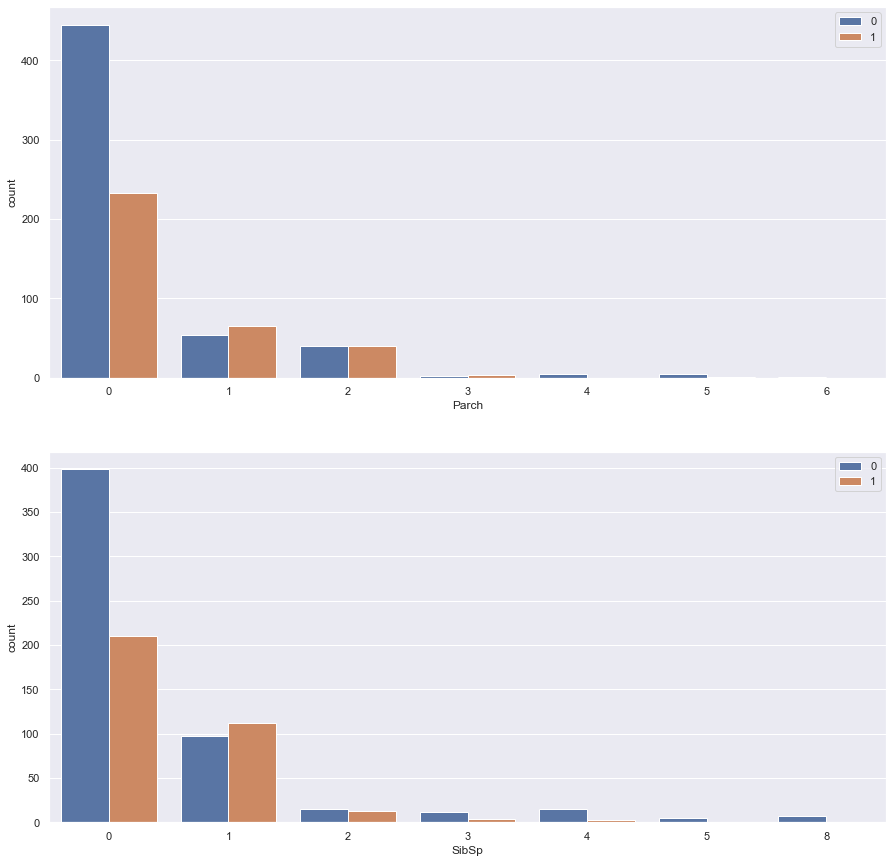

In [274]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(15, 15))
plt.subplot(2, 1, 1)
sns.countplot(data = train, x = 'Parch', hue = 'Survived')
plt.legend(loc='upper right')
plt.subplot(2, 1, 2)
sns.countplot(data = train, x = 'SibSp', hue = 'Survived')
plt.legend(loc='upper right')
plt.show()

Посмотрим на вероятности выживания людей в зависимости от возраста:

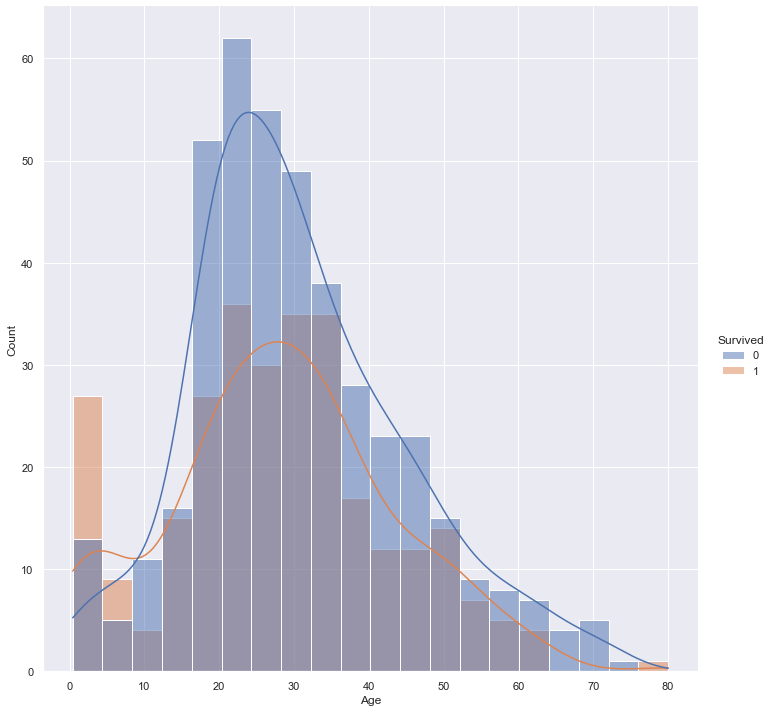

In [275]:
sns.displot(data = train, x = 'Age', hue = 'Survived', kde=True, height = 10)

Попробуем выделить некоторые данные из исходных таблиц, практически не изменяя и не добавляя новые признаки:

In [276]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = pd.concat([train, test], ignore_index=True, sort  = False)

Рассмотрим отсутствующие данные в таблицах:

In [277]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Удалим из наборов данных столбец "Cabin", а также заполним значения Age и Fare медианными:

In [278]:
df.drop(['Cabin'], axis=1, inplace=True)
grp = df.groupby(['Sex'])
df['Age'] = grp.Age.apply(lambda x: x.fillna(x.median()))
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Embarked'].fillna('S', inplace=True)

Представим категориальные данные числами:

In [279]:
df["Embarked"]= LabelEncoder().fit_transform(df["Embarked"])
df['Sex']= LabelEncoder().fit_transform(df['Sex'])

Выделим признаки, по которым будет производиться обучение моделей:

In [280]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [281]:
X = df.dropna()
X = X.drop('Survived', 1)
X_test = df[df.Survived.isnull()]
X_test = X_test.drop('Survived', 1)
y = train['Survived']

In [282]:
model = RandomForestClassifier(random_state=0, criterion = 'gini', n_estimators= 300 ,max_features = 'auto',max_depth = 6)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Submission.csv', index=False)
model.score(X, y)
model = round(model.score(X, y) * 100, 2)
model

86.53

In [283]:
model = GaussianNB()
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Submission.csv', index=False)
model.score(X, y)
model = round(model.score(X, y) * 100, 2)
model

79.24

In [284]:
model = LogisticRegression(max_iter=10000)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Submission.csv', index=False)
model.score(X, y)
model = round(model.score(X, y) * 100, 2)
model

79.91

In [285]:
model = KNeighborsClassifier(leaf_size=20, n_neighbors=6)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Submission.csv', index=False)
model.score(X, y)
model = round(model.score(X, y) * 100, 2)
model

79.35

RandomForestClassifier с заданными параметрами на Kaggle набирает 0,787, GaussianNB - 0,753, LogisticRegression - 0,7655, KNeighborsClassifier - 0,67

Попробуем убрать Embarked из признаков, а также объединить данные о семье/супругах в один столбец. Разобъем данные из "Fare" и "Age" на диапазоны, после чего сопоставим каждому диапазону соответствующее число с помощью LabelEncoder().

In [286]:
df.drop(['Embarked'], axis = 1, inplace = True)

In [287]:
df['Family'] = df.Parch + df.SibSp

In [288]:
df['FareBin'] = pd.qcut(df['Fare'], 5)
df['FareBin_Code'] = LabelEncoder().fit_transform(df['FareBin'])
df['AgeBin'] = pd.qcut(df['Age'], 4)
df['AgeBin_Code'] = LabelEncoder().fit_transform(df['AgeBin'])

In [289]:
df.drop(['FareBin', 'AgeBin', 'Age', 'Fare', 'SibSp', 'Parch'], axis = 1, inplace = True)

In [290]:
X = df.dropna()
X = X.drop('Survived', 1)
X_test = df[df.Survived.isnull()]
X_test = X_test.drop('Survived', 1)
y = train['Survived']

In [291]:
model = RandomForestClassifier(random_state=0, criterion = 'gini', n_estimators= 300 ,max_features = 'auto',max_depth = 6)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Submission.csv', index=False)
model.score(X, y)
model = round(model.score(X, y) * 100, 2)
model

84.4

In [292]:
model = GaussianNB()
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Submission.csv', index=False)
model.score(X, y)
model = round(model.score(X, y) * 100, 2)
model

77.55

In [293]:
model = LogisticRegression(max_iter=10000)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Submission.csv', index=False)
model.score(X, y)
model = round(model.score(X, y) * 100, 2)
model

79.8

In [294]:
model = KNeighborsClassifier(leaf_size=20, n_neighbors=6)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Submission.csv', index=False)
model.score(X, y)
model = round(model.score(X, y) * 100, 2)
model

82.27

RandomForestClassifier с заданными параметрами на Kaggle набирает 0,777, GaussianNB - 0,70, LogisticRegression - 0,758, KNeighborsClassifier - 0,753

Общие результаты немного ухудшились, однако KNeighborsClassifier заметно увеличил общую оценку. Попробуем немного изменить выделенные признаки, а также добавить еще один: вероятность выживания, который будет вычисляться в завимимости от того, выжил ли кто-то из членов семьи/членов с таким же номером билета

Снова объединим данные из train и test в вспомогательную таблицу, в которой будем вычислять требуемые признаки

In [295]:
td = pd.concat([train, test], ignore_index=True, sort  = False)

Удалим некоторые данные из df, которые необходимо пересчитать

In [296]:
df.drop(['AgeBin_Code', 'FareBin_Code'], axis = 1, inplace = True)

Создадим новый стоблец, куда занесем "титулы" пассажиров. После чего поменяем редкие титулы на привичные Mr и Miss. Далее по новому столбцу заполним пропуски возрастов в зависимости от титула.

In [297]:
td['Title'] = td['Name']
td['Title'] = td.Title.apply(lambda name: name.split(',')[1].split('.')[0].strip())
mapTitles = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
td.replace({'Title': mapTitles}, inplace=True)
grp = td.groupby(['Title'])
td['Age'] = grp.Age.apply(lambda x: x.fillna(x.median()))
df['Age'] = td['Age']

In [298]:
df

,Survived,Pclass,Sex,Family,Age
0,0.0,3,1,1,22.0
1,1.0,1,0,1,38.0
2,1.0,3,0,0,26.0
3,1.0,1,0,1,35.0
4,0.0,3,1,0,35.0
...,...,...,...,...,...
1304,NaN,3,1,0,30.0
1305,NaN,1,0,0,39.0
1306,NaN,3,1,0,38.5
1307,NaN,3,1,0,30.0


Введем новый столбец "Survival_ratio":

In [299]:
td['Last_Name'] = td['Name'].apply(lambda x: str.split(x, ",")[0])
td['Fare'].fillna(td['Fare'].mean(), inplace=True)
for i in range(0,len(td)):
    td.loc[i,'Survival_ratio']=0.5
for grp, grp_df in td[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            Surv_rat_max = grp_df.drop(ind)['Survived'].max()
            Surv_rat_min = grp_df.drop(ind)['Survived'].min()
            ID_pas = row['PassengerId']
            if (Surv_rat_max == 1.0):
                td.loc[td['PassengerId'] == ID_pas, 'Survival_ratio'] = 1
            elif (Surv_rat_min == 0.0):
                td.loc[td['PassengerId'] == ID_pas, 'Survival_ratio'] = 0
for _, grp_df in td.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Survival_ratio'] == 0) | (row['Survival_ratio']== 0.5):
                Surv_rat_max = grp_df.drop(ind)['Survived'].max()
                Surv_rat_min = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (Surv_rat_max == 1.0):
                    td.loc[td['PassengerId'] == ID_pas, 'Survival_ratio'] = 1
                elif (Surv_rat_min == 0.0):
                    td.loc[td['PassengerId'] == ID_pas, 'Survival_ratio'] = 0
df['Survival_ratio'] = td['Survival_ratio']
df['Fare'] = td['Fare']
grp = td.groupby(['Pclass'])
df['Fare'] = grp.Fare.apply(lambda x: x.fillna(x.median()))

Заного разбиваем данные из "Fare" и "Age"

In [300]:
df['FareBin'] = pd.qcut(df['Fare'], 5)
df['FareBin_Code'] = LabelEncoder().fit_transform(df['FareBin'])
df['AgeBin'] = pd.qcut(df['Age'], 4)
df['AgeBin_Code'] = LabelEncoder().fit_transform(df['AgeBin'])

Убираем лишнее

In [301]:
df.drop(['Fare', 'AgeBin', 'FareBin', 'Age'], axis = 1, inplace = True)

Снова разделим данные на тренировочную и тестовую таблицы:

In [302]:
X = df.dropna()
X = X.drop('Survived', 1)
X_test = df[df.Survived.isnull()]
X_test = X_test.drop('Survived', 1)
y = train['Survived']

Преобразовываем данные с помощью StandardScaler() (МО = 0, СКО = 1)

In [303]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

Теперь при использовании классификаторов сначала будем искать лучшие параметры с помощью GridSearchCV (возьмем два классификатора: RandomForest и KNeighbors):

In [304]:
n_estimators = [100, 200, 300]
max_depth = [1, 2, 3, 4, 5, 6]
criterion = ['gini', 'entropy']
hyperparams = {'criterion': criterion, 'max_depth': max_depth, 'n_estimators': n_estimators}
gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, verbose=True, cv=10, scoring = "roc_auc")
gd.fit(X, y)
gd.best_estimator_.fit(X, y)
predictions = gd.best_estimator_.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Submission.csv', index=False)
best_gd_RF = gd.best_estimator_
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.7min finished


0.888671703024644
RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=300)


In [305]:
n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto', 'ball_tree', 'kd_tree']
leaf_size = [1, 5, 10, 15, 20, 25, 30, 35]
hyperparams = {'algorithm': algorithm, 'leaf_size': leaf_size, 'n_neighbors': n_neighbors}
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc")
gd.fit(X, y)
gd.best_estimator_.fit(X, y)
predictions = gd.best_estimator_.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Submission.csv', index=False)
best_gd_KN = gd.best_estimator_
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8798528704411057
KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=18)


[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed:   12.7s finished


RandomForest в данном случае при подборе параметров показывает результат 0,79, KNeighbors - 0,803

Воспользуемся инструментом для построения ансамбля моделей классификации VotingClassifier и попробуем увеличить общую оценку:

In [307]:
voting_clf = VotingClassifier(estimators = [('RandomForest',best_gd_RF),('KNeighbors',best_gd_KN)], voting = 'hard')
voting_clf.fit(X,y)
predictions = voting_clf.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Summission_Out.csv', index=False)

Итоговое качество предсказаний немного повысилось и составляет 0,81339

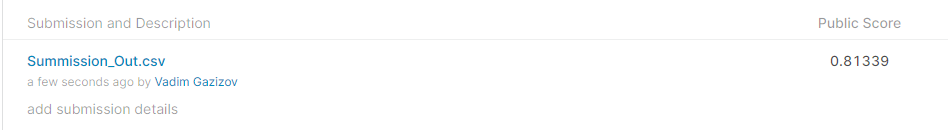
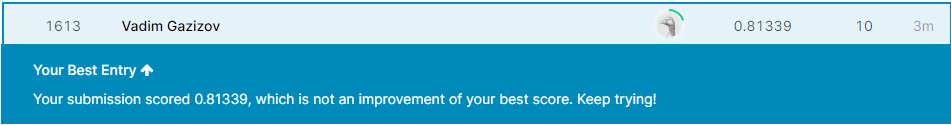